In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
house_price_dataset=pd.read_csv("/content/Cleaned_data.csv")

In [5]:
print(house_price_dataset)

       Unnamed: 0             location  total_sqft  bath   price  bhk
0               0  1st Block Jayanagar      2850.0   4.0  428.00    4
1               1  1st Block Jayanagar      1630.0   3.0  194.00    3
2               2  1st Block Jayanagar      1875.0   2.0  235.00    3
3               3  1st Block Jayanagar      1200.0   2.0  130.00    3
4               4  1st Block Jayanagar      1235.0   2.0  148.00    2
...           ...                  ...         ...   ...     ...  ...
10296       10296                other      1353.0   2.0  110.00    2
10297       10297                other       812.0   1.0   26.00    1
10298       10298                other      1440.0   2.0   63.93    3
10299       10299                other      1075.0   2.0   48.00    2
10300       10300                other      3600.0   5.0  400.00    4

[10301 rows x 6 columns]


In [6]:
house_price_dataframe = house_price_dataset.copy()
house_price_dataframe.info()
house_price_dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10301 non-null  int64  
 1   location    10301 non-null  object 
 2   total_sqft  10301 non-null  float64
 3   bath        10301 non-null  float64
 4   price       10301 non-null  float64
 5   bhk         10301 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 483.0+ KB


,Unnamed: 0,location,total_sqft,bath,price,bhk
0,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [7]:
house_price_dataframe['price'] = house_price_dataset['price']

In [8]:
house_price_dataframe.shape

(10301, 6)

In [9]:
house_price_dataframe.isnull().sum()

,0
Unnamed: 0,0
location,0
total_sqft,0
bath,0
price,0
bhk,0


In [10]:
house_price_dataframe.describe()

,Unnamed: 0,total_sqft,bath,price,bhk
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,5150.000000,1508.440608,2.471702,91.286372,2.574896
std,2973.786896,880.694214,0.979449,86.342786,0.897649
min,0.000000,300.000000,1.000000,10.000000,1.000000
25%,2575.000000,1110.000000,2.000000,49.000000,2.000000
50%,5150.000000,1286.000000,2.000000,67.000000,2.000000
75%,7725.000000,1650.000000,3.000000,100.000000,3.000000
max,10300.000000,30400.000000,16.000000,2200.000000,16.000000


In [11]:
import pandas as pd
import numpy as np
numerical_features = house_price_dataframe.select_dtypes(include=np.number)
correlation = numerical_features.corr()

<Axes: >

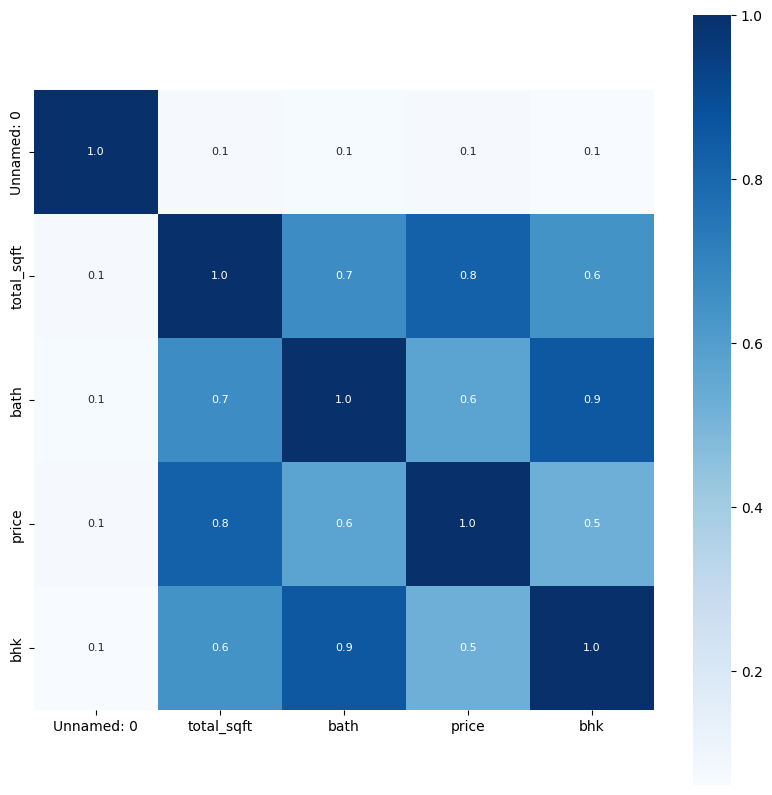

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [14]:
print(X)
print(Y)

       Unnamed: 0             location  total_sqft  bath  bhk
0               0  1st Block Jayanagar      2850.0   4.0    4
1               1  1st Block Jayanagar      1630.0   3.0    3
2               2  1st Block Jayanagar      1875.0   2.0    3
3               3  1st Block Jayanagar      1200.0   2.0    3
4               4  1st Block Jayanagar      1235.0   2.0    2
...           ...                  ...         ...   ...  ...
10296       10296                other      1353.0   2.0    2
10297       10297                other       812.0   1.0    1
10298       10298                other      1440.0   2.0    3
10299       10299                other      1075.0   2.0    2
10300       10300                other      3600.0   5.0    4

[10301 rows x 5 columns]
0        428.00
1        194.00
2        235.00
3        130.00
4        148.00
          ...  
10296    110.00
10297     26.00
10298     63.93
10299     48.00
10300    400.00
Name: price, Length: 10301, dtype: float64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(10301, 5) (8240, 5) (2061, 5)


In [17]:
model = XGBRegressor()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
# ... (Your existing code to load and prepare data) ...

# Before fitting the model, convert the 'location' column to categorical:
X_train['location'] = X_train['location'].astype('category')
#If X_test also has 'location' column
X_test['location'] = X_test['location'].astype('category')


# Now you can fit the model:
model = XGBRegressor(enable_categorical=True) # Add enable_categorical=True
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
training_data_prediction = model.predict(X_train)

In [20]:
print(training_data_prediction)

[28.095654 89.85627  41.722588 ... 55.961987 93.944565 67.96254 ]


In [21]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9715109625447339
Mean Absolute Error :  8.45590096045929


In [24]:
test_data_prediction = model.predict(X_test)

In [25]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.3488195682755275
Mean Absolute Error :  35.088820147970125


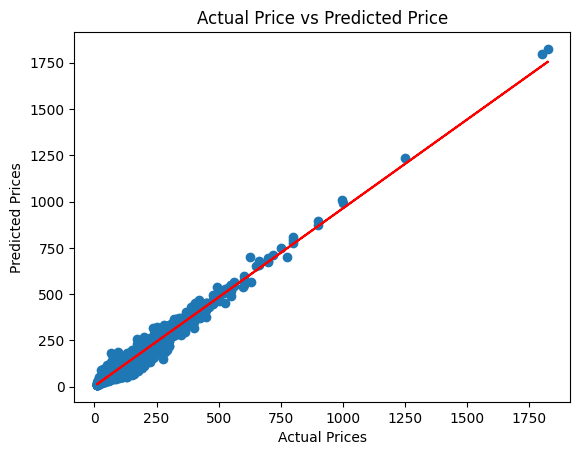

In [26]:
# prompt: give the best fit linepoint for this linear regression

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")

# Add the best fit line
m, b = np.polyfit(Y_train, training_data_prediction, 1)
plt.plot(Y_train, m*Y_train + b, color='red')

plt.show()